In [1]:
!python -m unittest discover -s tests

2023-10-04 16:29:03.383872: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 16:29:03.522592: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-04 16:29:03.522617: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-04 16:29:04.496470: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 670/670 [03:20<00:00,  3.35it/s]


Resizing test images


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:01<00:00, 63.94it/s]


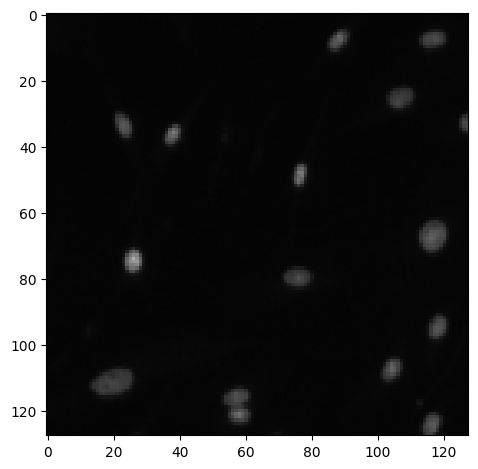

In [1]:
from src.canvas import Canvas
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

canvas = Canvas()
canvas.resize_images_and_masks()
canvas.predict_x()
image_idx = 5
imshow(canvas.x_train[image_idx])
plt.show()

In [8]:
from src.unet import UNet
import tensorflow as tf
# Example usage
unet = UNet()
unet.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# unet.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = unet.model.fit(canvas.x_train, canvas.y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25


38/38 [==============================] - 100s 3s/step - loss: 0.5443 - accuracy: 0.7821 - val_loss: 0.4116 - val_accuracy: 0.8332
Epoch 2/25
38/38 [==============================] - 99s 3s/step - loss: 0.3051 - accuracy: 0.8561 - val_loss: 0.2160 - val_accuracy: 0.9110
Epoch 3/25
38/38 [==============================] - 101s 3s/step - loss: 0.1803 - accuracy: 0.9350 - val_loss: 0.1681 - val_accuracy: 0.9323
Epoch 4/25
38/38 [==============================] - 101s 3s/step - loss: 0.1315 - accuracy: 0.9493 - val_loss: 0.1718 - val_accuracy: 0.9419
Epoch 5/25
38/38 [==============================] - 101s 3s/step - loss: 0.1227 - accuracy: 0.9539 - val_loss: 0.1204 - val_accuracy: 0.9534
Epoch 6/25
38/38 [==============================] - 101s 3s/step - loss: 0.1115 - accuracy: 0.9577 - val_loss: 0.1260 - val_accuracy: 0.9529
Epoch 7/25
38/38 [==============================] - 101s 3s/step - loss: 0.1115 - accuracy: 0.9580 - val_loss: 0.1231 - val_accuracy: 0.9548


3/3 [==============================] - 2s 526ms/step


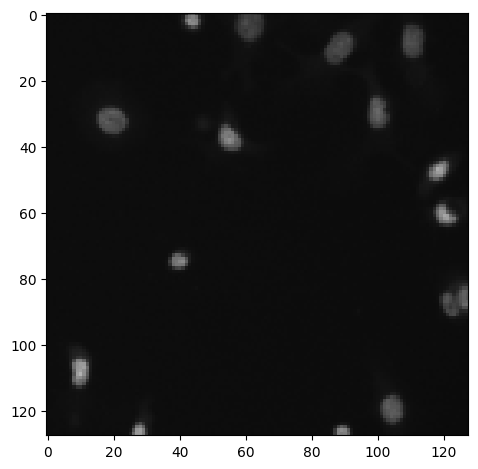

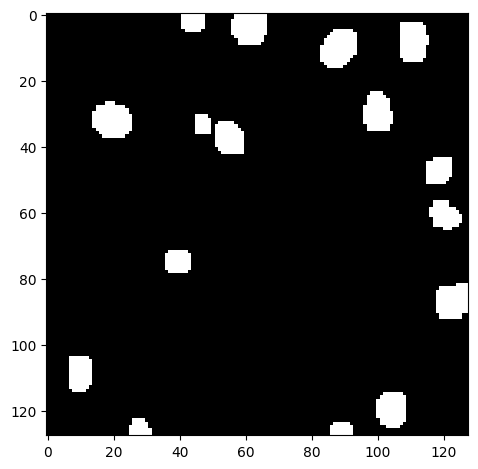

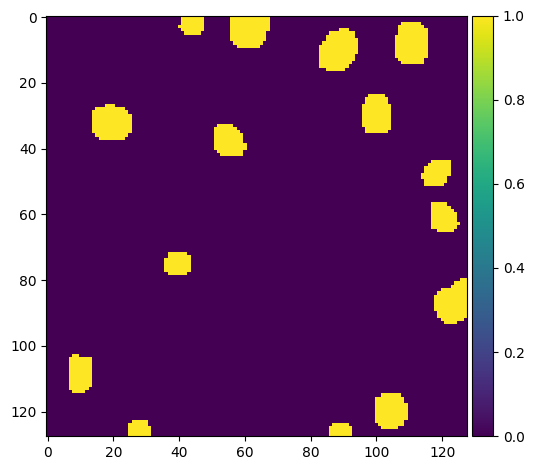

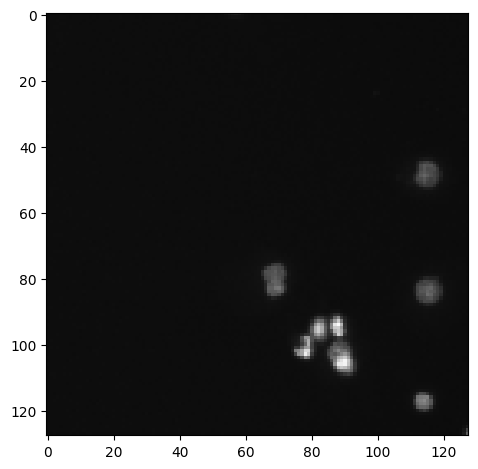

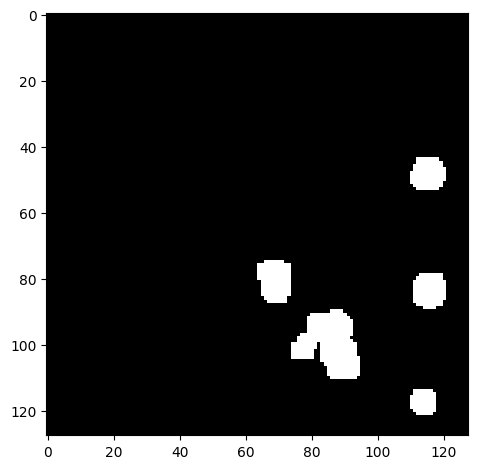

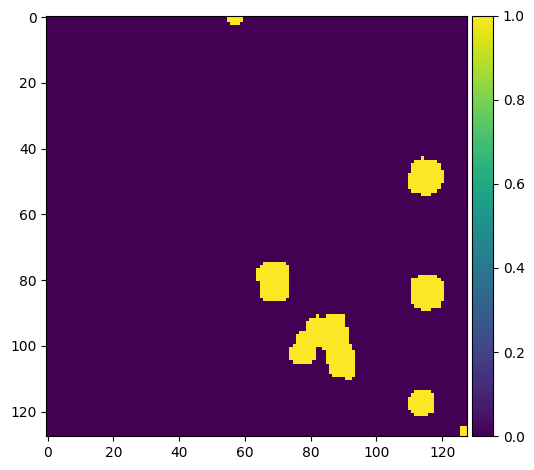

In [9]:
import random
import numpy as np
idx = random.randint(0, len(canvas.x_train))


preds_train = unet.model.predict(canvas.x_train[:int(canvas.x_train.shape[0]*0.9)], verbose=1)
preds_val = unet.model.predict(canvas.x_train[int(canvas.x_train.shape[0]*0.9):], verbose=1)
preds_test = unet.model.predict(canvas.x_predicts, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(canvas.x_train[ix])
plt.show()
imshow(np.squeeze(canvas.y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(canvas.x_train[int(canvas.x_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(canvas.y_train[int(canvas.y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()
